# Ejercicio de programación Regresión Lineal

In [20]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida. 

In [21]:
# Leer datos separados por una coma
data = np.loadtxt( os.path.join('strokeDataset.csv'), delimiter=',', skiprows=1)

x, y = data[:, 1], data[:, 7]

m = y.size  # m = numero de ejemplos de entrenamiento

In [22]:
print(x)
print(y)
print(m)

[61.   59.   78.   57.   58.   59.   63.   75.   76.   78.   63.   78.
 75.   76.   51.   66.   58.   58.   76.   72.   78.   75.   38.   65.
 79.   76.   71.    1.32 79.   64.   79.   78.   80.   77.   61.   79.
 74.   76.   74.   71.   34.   76.   63.   61.   54.   40.   48.   61.
 31.   43.    9.   52.   77.   17.   71.   35.   23.   40.   23.   71.
 13.   73.    3.   51.   35.   73.    6.   46.   71.   54.   80.   49.
 72.   25.   27.   51.   48.    7.   61.   25.   30.   71.   47.   76.
 29.   48.   57.   58.   45.   66.   59.   34.   69.   66.   48.   32.
 60.   30.   60.   10.   20.   77.   67.   42.   60.    0.48 35.   50.
 19.   77.   67.   20.   49.   77.   52.   43.   69.   34.   78.   76.
 62.   71.   79.   79.   54.   73.    5.   38.   72.   14.   50.   29.
 75.   68.   33.   63.   56.   70.   71.   73.   67.   62.   38.   47.
 42.   58.   44.   42.   78.   68.   39.   60.   31.   67.   52.   53.
 33.   53.   49.   52.   41.    1.88 34.   16.   45.    1.08  1.8  13.
 61.  

### 1.1 Trazar los datos

In [23]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=5, mec='r')
    pyplot.ylabel('BMI')
    pyplot.xlabel('EDAD')


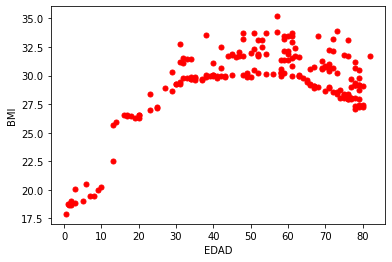

In [24]:
plotData(x, y)

In [25]:
pyplot.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion 
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [26]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

x = np.stack([np.ones(m), x], axis=1)
print(x)

[[ 1.   61.  ]
 [ 1.   59.  ]
 [ 1.   78.  ]
 [ 1.   57.  ]
 [ 1.   58.  ]
 [ 1.   59.  ]
 [ 1.   63.  ]
 [ 1.   75.  ]
 [ 1.   76.  ]
 [ 1.   78.  ]
 [ 1.   63.  ]
 [ 1.   78.  ]
 [ 1.   75.  ]
 [ 1.   76.  ]
 [ 1.   51.  ]
 [ 1.   66.  ]
 [ 1.   58.  ]
 [ 1.   58.  ]
 [ 1.   76.  ]
 [ 1.   72.  ]
 [ 1.   78.  ]
 [ 1.   75.  ]
 [ 1.   38.  ]
 [ 1.   65.  ]
 [ 1.   79.  ]
 [ 1.   76.  ]
 [ 1.   71.  ]
 [ 1.    1.32]
 [ 1.   79.  ]
 [ 1.   64.  ]
 [ 1.   79.  ]
 [ 1.   78.  ]
 [ 1.   80.  ]
 [ 1.   77.  ]
 [ 1.   61.  ]
 [ 1.   79.  ]
 [ 1.   74.  ]
 [ 1.   76.  ]
 [ 1.   74.  ]
 [ 1.   71.  ]
 [ 1.   34.  ]
 [ 1.   76.  ]
 [ 1.   63.  ]
 [ 1.   61.  ]
 [ 1.   54.  ]
 [ 1.   40.  ]
 [ 1.   48.  ]
 [ 1.   61.  ]
 [ 1.   31.  ]
 [ 1.   43.  ]
 [ 1.    9.  ]
 [ 1.   52.  ]
 [ 1.   77.  ]
 [ 1.   17.  ]
 [ 1.   71.  ]
 [ 1.   35.  ]
 [ 1.   23.  ]
 [ 1.   40.  ]
 [ 1.   23.  ]
 [ 1.   71.  ]
 [ 1.   13.  ]
 [ 1.   73.  ]
 [ 1.    3.  ]
 [ 1.   51.  ]
 [ 1.   35.  ]
 [ 1.   73.  ]
 [ 1.    6

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [27]:
def calcularCosto(x, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento
   
    J = 0
    h = np.dot(x, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(x, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$. 

In [28]:
J = calcularCosto(x, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = calcularCosto(x, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Con theta = [0, 0] 
 Costo calculado = 435.95
Valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
 Costo calculado = 3631.01
Valor de costo esperado (aproximadamente)  54.24


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso. 

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [29]:
def gradientDescent(x, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    
    # hace una copia de theta, para evitar cambiar la matriz original, 
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()
    
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(x, theta) - y).dot(x)
        # save the cost J in every iteration
        J_history.append(calcularCosto(x, y, theta))
    
    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [43]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 10000
alpha = 0.00009

theta, J_history = gradientDescent(x ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')
print(J_history[:5])
print(J_history[-5:])

Theta encontrada por descenso gradiente: 3.2434, 0.4369
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]
[246.459845048074, 150.4870580500136, 101.87931321240518, 77.26041738064043, 64.79109116400961]
[40.35436476030359, 40.3533535639082, 40.35234239556495, 40.35133125527305, 40.35032014303174]


Se utilizan los parametros finales para grafical la linea.

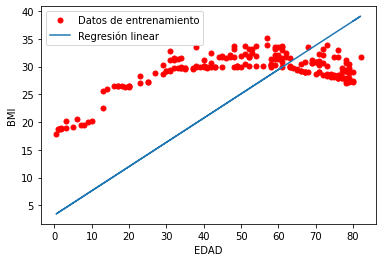

In [44]:
# grafica la linea de ajuste
plotData(x[:, 1], y)
pyplot.plot(x[:, 1], np.dot(x, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [48]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 33], theta)
print(predict1)

predict2 = np.dot([1, 70], theta)
print(predict2)

17.662276074062575
33.828922831907725


### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$. 

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

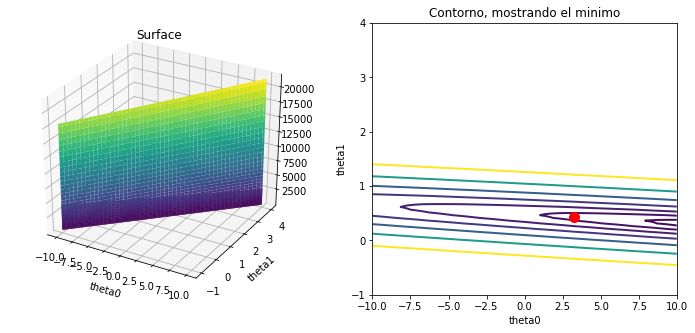

In [49]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = calcularCosto(x, y, [theta0, theta1])
        
# Debido a la forma en que funcionan las cuadrículas en el comando surf, 
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')
pass